<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-are-the-probable-sites-of-prenyl-attachment-of-non-conventional-protein-prenylation-events?" data-toc-modified-id="What-are-the-probable-sites-of-prenyl-attachment-of-non-conventional-protein-prenylation-events?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What are the probable sites of prenyl attachment of non-conventional protein prenylation events?</a></span><ul class="toc-item"><li><span><a href="#Annotate-secondary-structure-of-cysteines" data-toc-modified-id="Annotate-secondary-structure-of-cysteines-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Annotate secondary structure of cysteines</a></span></li><li><span><a href="#Search-for-most-accessible-cysteines" data-toc-modified-id="Search-for-most-accessible-cysteines-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Search for most accessible cysteines</a></span></li></ul></li><li><span><a href="#SequenceLogos-for-internally-prenylated-proteins-with-1-most-accessible-cysteine" data-toc-modified-id="SequenceLogos-for-internally-prenylated-proteins-with-1-most-accessible-cysteine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SequenceLogos for internally prenylated proteins with 1 most accessible cysteine</a></span><ul class="toc-item"><li><span><a href="#Sorted-by-accessibility" data-toc-modified-id="Sorted-by-accessibility-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sorted by accessibility</a></span></li><li><span><a href="#Sorted-by-moiety" data-toc-modified-id="Sorted-by-moiety-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sorted by moiety</a></span></li><li><span><a href="#Sorted-by-secondary-structure" data-toc-modified-id="Sorted-by-secondary-structure-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sorted by secondary structure</a></span></li><li><span><a href="#Hypergeometric-distribution-and-Fisher's-exact-test" data-toc-modified-id="Hypergeometric-distribution-and-Fisher's-exact-test-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Hypergeometric distribution and Fisher's exact test</a></span></li></ul></li><li><span><a href="#Search-for-double-prenylated-cysteines" data-toc-modified-id="Search-for-double-prenylated-cysteines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Search for double prenylated cysteines</a></span></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
#from structuremap_annotation import annotate_structuremap
from functions import clean_agg
from functions import Urn
from functions import fishers_exact_test
from functions import annotate_most_accs_C
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Display session information
session_info.show()

In [4]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Load data
datafolder = 'data'
PSSMSearch = 'data\PSSMSearch'
Foldseek = 'data\Foldseek'
Background = r'C:\Users\ale\DataspellProjects\CodeSIAF\Background\data'

# Internally prenylated proteins
F_internal = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'F_internal.csv'), sep=',')
GG_internal = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'GG_internal.csv'), sep=',')
F_GG_internal = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'F_GG_internal.csv'), sep=',')

UP_new = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel_motif.csv'), sep=',')

# Master file
master_df = pd.read_csv(os.path.join('..', 'master_df.csv'), sep=',')

# What are the probable sites of prenyl attachment of non-conventional protein prenylation events?

Mapping of the cysteine sequence motifs onto the protein 3D structure 

In [6]:
print('F internal proteins: ', len(F_internal['ID'].unique()), ', GG internal proteins: ',len(GG_internal['ID'].unique()), 
       ', F & GG internal proteins: ',len(F_GG_internal['ID'].unique()), sep='')

F internal proteins: 184, GG internal proteins: 133, F & GG internal proteins: 157


In [7]:
# Concatenate F, GG, F_GG dfs for Structuremap analysis of all internally prenylated proteins

pren_internal = pd.concat([F_internal, GG_internal, F_GG_internal]).reset_index(drop=True)

print('All internally prenylated proteins:', len(pren_internal['ID'].unique()))

All internally prenylated proteins: 474


In [8]:
pren_internal[pren_internal['seq'].isna()]

,ID,seqID,seq,len,Cpos,Ccount,motif,N_Cpos,Count_all,pep,pepCCC,pepCC,pepCXC,pepC


In [9]:
# Check and remove proteins for which we only have sequence isoforms to work with
# AlphaFold doesn't yet contain 3D structures of isoforms

F_internal = F_internal[~F_internal['seqID'].str.contains('-')]
GG_internal = GG_internal[~GG_internal['seqID'].str.contains('-')]
F_GG_internal = F_GG_internal[~F_GG_internal['seqID'].str.contains('-')]

pren_internal = pren_internal[~pren_internal['seqID'].str.contains('-')]

In [10]:
print('F internal proteins: ', len(F_internal['ID'].unique()), ', GG internal proteins: ',len(GG_internal['ID'].unique()), 
       ', F & GG internal proteins: ',len(F_GG_internal['ID'].unique()), sep='')
print('All internally prenylated proteins:', len(pren_internal['ID'].unique()))

# 4 farnesylated proteins fell out

F internal proteins: 180, GG internal proteins: 133, F & GG internal proteins: 157
All internally prenylated proteins: 470


In [11]:
len(pren_internal)

4796

In [12]:
pren_internal[pren_internal['ID'] == 'Q8TCD1']

,ID,seqID,seq,len,Cpos,Ccount,motif,N_Cpos,Count_all,pep,pepCCC,pepCC,pepCXC,pepC
4277,Q8TCD1,sp|Q8TCD1|CR032_HUMAN,MVCIPCIVIPVLLWIYKKFLEPYIYPLVSPFVSRIWPKKAIQESND...,76,-74,3,NaN,3,3,MVCIPCIV,NaN,NaN,NaN,NaN
4278,Q8TCD1,sp|Q8TCD1|CR032_HUMAN,MVCIPCIVIPVLLWIYKKFLEPYIYPLVSPFVSRIWPKKAIQESND...,76,-71,3,NaN,6,3,MVCIPCIVIPV,NaN,NaN,NaN,MVCIPCIVIPV
4279,Q8TCD1,sp|Q8TCD1|CR032_HUMAN,MVCIPCIVIPVLLWIYKKFLEPYIYPLVSPFVSRIWPKKAIQESND...,76,-6,3,NaN,71,3,GPTEICDKKKD,NaN,NaN,NaN,GPTEICDKKKD


## Annotate secondary structure of cysteines

In [13]:
# run Structuremap 

#annotate_structuremap(pren_internal, "up_output_multi_disulfid_04.10.23.csv", group='all_pren', max_dist=30, max_angle=180)

## Search for most accessible cysteines

In [14]:
# load
pren_intern_pep = pd.read_csv(os.path.join(datafolder, 'AlphaFold_annotated', 'all_pren_structure.csv'), sep=',')

In [15]:
print('total of Cs in internally prenylated proteins:', len(pren_intern_pep))
print('total of internally prenylated proteins:', len(pren_intern_pep['ID'].unique()))

total of Cs in internally prenylated proteins: 4482
total of internally prenylated proteins: 462


In [16]:
# Check which proteins we lost during the AlpaFold analysis
lost = pren_internal[~pren_internal['ID'].isin(pren_intern_pep['ID'])]
lost = lost.groupby(['ID']).agg(set).reset_index()
lost = clean_agg(lost)
lost[['ID', 'seqID']]

# 7 invalid proteins
# 1 protein where AlphaFold contains the sequence isoform -2, not the canonical, must be a mistake in AlphaFold (Q16850|CP51A)

,ID,seqID
0,O94915,sp|O94915|FRYL_HUMAN
1,P04114,sp|P04114|APOB_HUMAN
2,P78527,sp|P78527|PRKDC_HUMAN
3,Q16850,sp|Q16850|CP51A_HUMAN
4,Q6ZNJ1,sp|Q6ZNJ1|NBEL2_HUMAN
5,Q9BQE4,sp|Q9BQE4|SELS_HUMAN
6,Q9C0D9,sp|Q9C0D9|EPT1_HUMAN
7,Q9Y4A5,sp|Q9Y4A5|TRRAP_HUMAN


In [17]:
pren_intern_pep.columns.values

array(['ID', 'name', 'quality', 'structure_group', 'Ccount', 'Count_all',
       'nAA_30_180_pae', 'len', 'Cpos', 'N_Cpos', 'pep', 'pepCCC',
       'pepCC', 'pepCXC', 'pepC'], dtype=object)

In [18]:
# annotate accessibility of cysteines based on pae value
agg_pren_intern_accs = annotate_most_accs_C(pren_intern_pep)

In [19]:
most_accs_all = agg_pren_intern_accs[agg_pren_intern_accs['accs_count'] == 1]

print('Out of', len(agg_pren_intern_accs), 'prenylated proteins', 
      len(most_accs_all), 'have exactly 1 most accessible cysteine.')

Out of 462 prenylated proteins 205 have exactly 1 most accessible cysteine.


In [20]:
#Update master file

# Add column pae_0 and fill with Cpos (1 most accessible cysteine at pae value 0, meaning no neighbours at 30 Angström distance)
C1_at_0_pae = agg_pren_intern_accs[(agg_pren_intern_accs['accs_count'] == 1) & 
                                   (agg_pren_intern_accs['lowest_pae'] == 0)].reset_index(drop=True)
master_df['pae_0'] = master_df['Protein_ID'].map(C1_at_0_pae.set_index('ID')['Cpos'])

# Add column lowest_pae and fil with Cpos (1 most accessible cysteine at lowest pae value)
C1_at_lowest_pae = agg_pren_intern_accs[(agg_pren_intern_accs['accs_count'] == 1) & 
                                        (agg_pren_intern_accs['lowest_pae'] != 0)].reset_index(drop=True)
master_df['Lowest_pae'] = master_df['Protein_ID'].map(C1_at_lowest_pae.set_index('ID')['Cpos'])

# Add the 11 AA long peptide with the most accessible 1 cysteine in the middle to the master dataframe
pren_all_C1 = agg_pren_intern_accs[agg_pren_intern_accs['accs_count'] == 1]
master_df['Internal_Motif'] = master_df['Protein_ID'].map(pren_all_C1.set_index('ID')['pep'])

In [21]:
# save
master_df.to_csv(os.path.join('..', 'master_df.csv'), sep=',', index=False)

In [22]:
# True C1
pren_Count_all_1 = C1_at_0_pae[C1_at_0_pae['Count_all'] == 1].reset_index(drop=True)

In [23]:
# C1 after disregarding cysteines in disulfide bonds
pren_Ccount_1 = C1_at_0_pae[(C1_at_0_pae['Ccount'] == 1) & 
                                             (C1_at_0_pae['Count_all'] != 1)].reset_index(drop=True)

In [24]:
# Proteins with 1 cysteine at 0 pae (not smoothed) and multiple Ccount
pren_pae_0 = C1_at_0_pae[(~C1_at_0_pae['ID'].isin(pren_Count_all_1['ID'])) & 
                          (~C1_at_0_pae['ID'].isin(pren_Ccount_1['ID']))]

In [25]:
# Name change for consistency
pren_lowest_pae_1 = C1_at_lowest_pae

In [26]:
# Cysteine positions for which we can't show the peptides in Sequence Logos because they are too N-terminal to align
print(len(pren_Count_all_1[pren_Count_all_1['N_Cpos'] < 6]))
print(len(pren_Ccount_1[pren_Ccount_1['N_Cpos'] < 6]))
print(len(pren_pae_0[pren_pae_0['N_Cpos'] < 6]))
print(len(pren_lowest_pae_1[pren_lowest_pae_1['N_Cpos'] < 6]))
print(len(pren_all_C1[pren_all_C1['N_Cpos'] < 6]))

0
0
6
2
8


In [27]:
most_accs_all[most_accs_all['N_Cpos'] < 6].reset_index(drop=True)

,ID,name,quality,structure_group,Ccount,Count_all,nAA_30_180_pae,len,Cpos,N_Cpos,pep,pepCCC,pepCC,pepCXC,pepC,lowest_pae,accs_count
0,Q6PIU2,NCEH1,84.84,HELX,5,5,0,408,-404,5,MRSSCVLLTA,NaN,NaN,NaN,NaN,0,1
1,Q8IYT2,CMTR2,32.59,unstructured,33,33,0,770,-767,4,MSKCRKTPV,NaN,NaN,NaN,NaN,0,1
2,Q9Y2X0,MED16,26.11,unstructured,30,30,0,877,-876,2,MCDLRRP,NaN,NaN,NaN,NaN,0,1
3,Q9H6R6,ZDHC6,40.57,unstructured,19,19,0,413,-409,5,MGTFCSVIKF,NaN,NaN,NaN,NaN,0,1
4,P07686,HEXB,42.68,unstructured,8,8,0,556,-553,4,MELCGLGLP,NaN,NaN,NaN,NaN,0,1
5,O60725,ICMT,44.13,unstructured,7,7,0,284,-281,4,MAGCAARAP,NaN,NaN,NaN,NaN,0,1
6,Q12999,TSN31,59.48,unstructured,11,11,1,210,-208,3,MVCGGFAC,NaN,NaN,NaN,NaN,1,1
7,P27701,CD82,81.48,HELX,11,11,3,267,-263,5,MGSACIKVTK,NaN,NaN,NaN,NaN,3,1


In [28]:
# remove proteins with too short N-terminal peptides
pren_pae_0 = pren_pae_0[pren_pae_0['N_Cpos'] >= 6].reset_index(drop=True)
pren_lowest_pae_1 = pren_lowest_pae_1[pren_lowest_pae_1['N_Cpos'] >= 6].reset_index(drop=True)
pren_all_C1 = pren_all_C1[pren_all_C1['N_Cpos'] >= 6].reset_index(drop=True)

In [29]:
# All proteins with identifiable probably most accessible cysteine
print(len(pren_Count_all_1), len(pren_Ccount_1), len(pren_pae_0), len(pren_lowest_pae_1))
print(len(pren_all_C1))

20 5 124 48
197


In [30]:
# Divide proteins with 1 most accessible cysteine by moiety
F_Count_all_1 = pren_all_C1[pren_all_C1['ID'].isin(F_internal['ID'])]
GG_Count_all_1 = pren_all_C1[pren_all_C1['ID'].isin(GG_internal['ID'])]
F_GG_Count_all_1 = pren_all_C1[pren_all_C1['ID'].isin(F_GG_internal['ID'])]

print(len(F_Count_all_1), len(GG_Count_all_1), len(F_GG_Count_all_1))
print(len(F_Count_all_1)+ len(GG_Count_all_1)+ len(F_GG_Count_all_1))

72 51 74
197


In [31]:
# Save df as c_positions.csv, to be read by Foldseek

data = {
    'F_Count_all_1': F_Count_all_1,
    'GG_Count_all_1': GG_Count_all_1,
    'F_GG_Count_all_1': F_GG_Count_all_1,
    
    'pren_Count_all_1': pren_Count_all_1,
    'pren_Ccount_1': pren_Ccount_1,
    'pren_pae_0': pren_pae_0,
    'pren_lowest_pae_1': pren_lowest_pae_1,
    
    'pren_all_C1': pren_all_C1
}

# Create each directory and save corresponding DataFrame as CSV
for directory_name, df in data.items():
    directory_path = os.path.join(Foldseek, directory_name)
    os.makedirs(directory_path, exist_ok=True)
    csv_file_path = os.path.join(directory_path, 'c_positions.csv')
    df.to_csv(csv_file_path, index=None, sep=',')

# AlphaFold quality of probably prenylated cysteines

Shapiro-Wilk Test for Group 1: W=0.8445256352424622, p-value=3.05692455940601e-13


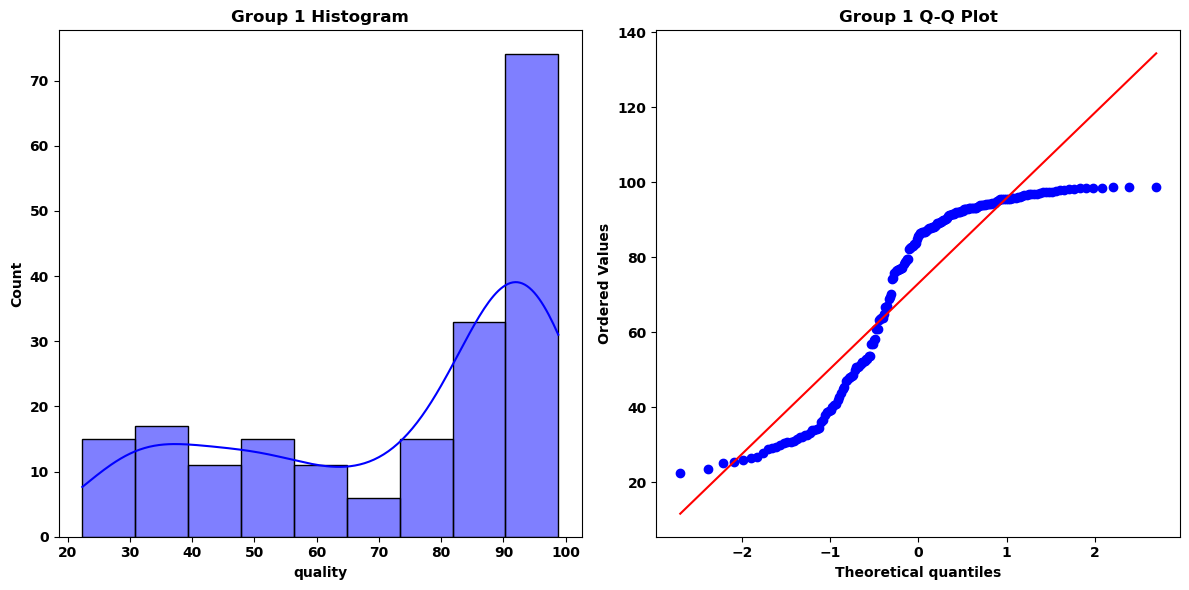

In [32]:
# Check for Normality:
# Use the Shapiro-Wilk test to check if the data follows a normal distribution.

#    Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
#    Ha(Rejected): Sample is not from the normal distributions.

# Perform the Shapiro-Wilk Test
shapiro_group1 = stats.shapiro(pren_all_C1['quality'])
print(f"Shapiro-Wilk Test for Group 1: W={shapiro_group1[0]}, p-value={shapiro_group1[1]}")

# Visualize the Data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(pren_all_C1['quality'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Group 1 Histogram')

# Q-Q Plot
stats.probplot(pren_all_C1['quality'], dist="norm", plot=axes[1])
axes[1].set_title('Group 1 Q-Q Plot')

plt.tight_layout()
plt.show()

In [33]:
# Since the p-value is 4.27e-13 which is less than the alpha(0.05) we reject the null hypothesis i.e. 
# we have sufficient evidence to say that sample does not come from a normal distribution.

In [34]:
back_all_C1 = pd.read_csv(os.path.join(Background, 'AlphaFold_annotated\pren_all_C1_quality.csv'), sep=',')

Mann-Whitney U Test: U=27261.0, p-value=0.4654189197078542


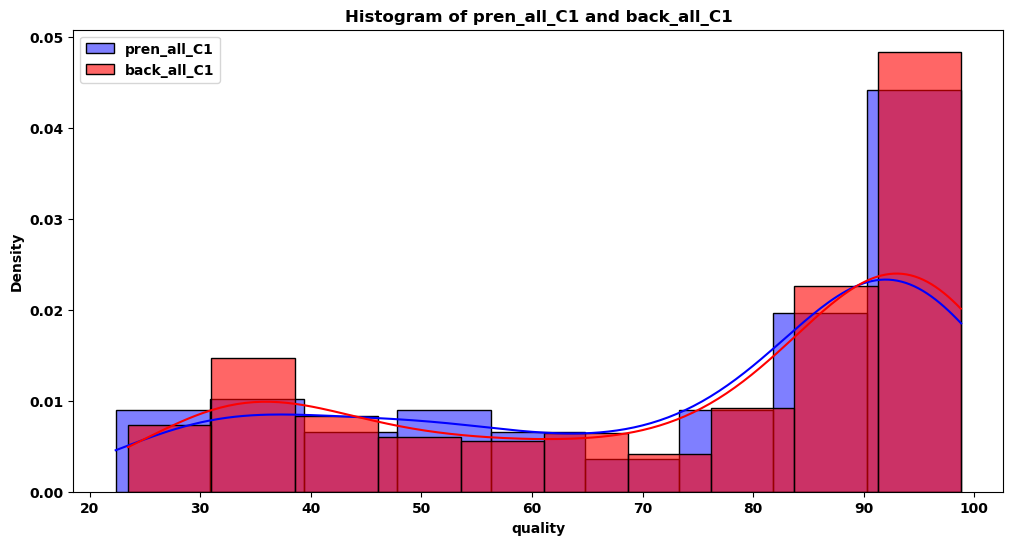

In [35]:
# Perform the Mann-Whitney U Test for non normally distributed samples

group1 = pren_all_C1['quality']
group2 = back_all_C1['quality']

mannwhitney_test = stats.mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney U Test: U={mannwhitney_test.statistic}, p-value={mannwhitney_test.pvalue}")

# Visualize the Data
plt.figure(figsize=(12, 6))

# Histograms
sns.histplot(group1, kde=True, color='blue', label='pren_all_C1', stat="density")
sns.histplot(group2, kde=True, color='red', label='back_all_C1', alpha=0.6, stat="density")
plt.title('Histogram of pren_all_C1 and back_all_C1')
plt.legend()
plt.show()

In [36]:
# The null hypothesis is that the distribution of the two groups is the same. We decide that a confidence level of 95% is 
# required to reject the null hypothesis in favor of the alternative that the distributions are different.

# The difference in the two groups is not significant with p-value=0.46.

# SequenceLogos for internally prenylated proteins with 1 most accessible cysteine

## Sorted by accessibility

In [37]:
# save peptides in txt format for pssmsearch
pren_Count_all_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'pren_Count_all_1.txt'), header=None, index=None, sep=' ')
pren_Ccount_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'pren_Ccount_1.txt'), header=None, index=None, sep=' ')
pren_pae_0['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'pren_pae_0.txt'), header=None, index=None, sep=' ')
pren_lowest_pae_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'pren_lowest_pae_1.txt'), header=None, index=None, sep=' ')
pren_all_C1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'pren_all_C1.txt'), header=None, index=None, sep=' ')

In [38]:
print('pren_Count_all_1:', len(pren_Count_all_1))
print('pren_Ccount_1:', len(pren_Ccount_1))
print('pren_pae_0:', len(pren_pae_0))
print('pren_lowest_pae_1:', len(pren_lowest_pae_1))
print('pren_all_C1:', len(pren_all_C1))

pren_Count_all_1: 20
pren_Ccount_1: 5
pren_pae_0: 124
pren_lowest_pae_1: 48
pren_all_C1: 197


## Sorted by moiety

In [39]:
# save for PSSMSearch
F_Count_all_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'F_all_C1.txt'), header=None, index=None, sep=' ')
GG_Count_all_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'GG_all_C1.txt'), header=None, index=None, sep=' ')
F_GG_Count_all_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'F_GG_all_C1.txt'), header=None, index=None, sep=' ')

In [40]:
print('Farnesylated:', len(F_Count_all_1))
print('Geranylgeranylated:', len(GG_Count_all_1))
print('Farnesylated & Geranylgeranylated:', len(F_GG_Count_all_1))

Farnesylated: 72
Geranylgeranylated: 51
Farnesylated & Geranylgeranylated: 74


## Sorted by secondary structure

In [41]:
# Define the list of structures for filtering
structure_groups = ['BEND', 'HELX', 'STRN', 'TURN', 'unstructured']

# Iterate over the list of structures to create df outputs

# All internally prenylated proteinswith exactly 1 most accessible cysteine
for structure in structure_groups:
    exec(f"{structure}_pren_intern_pep = pren_all_C1[pren_all_C1['structure_group'] == '{structure}'].reset_index(drop=True)")
    
# All internally prenylated proteinswith exactly 1 most accessible cysteine
for structure in structure_groups:
    exec(f"F_{structure}_pren_intern_pep = F_Count_all_1[F_Count_all_1['structure_group'] == '{structure}'].reset_index(drop=True)")
    
# All internally prenylated proteinswith exactly 1 most accessible cysteine
for structure in structure_groups:
    exec(f"GG_{structure}_pren_intern_pep = GG_Count_all_1[GG_Count_all_1['structure_group'] == '{structure}'].reset_index(drop=True)")
    
# All internally prenylated proteinswith exactly 1 most accessible cysteine
for structure in structure_groups:
    exec(f"F_GG_{structure}_pren_intern_pep = F_GG_Count_all_1[F_GG_Count_all_1['structure_group'] == '{structure}'].reset_index(drop=True)")

In [42]:
print('Pren: BEND', len(BEND_pren_intern_pep),', HELX', len(HELX_pren_intern_pep), ', STRN', len(STRN_pren_intern_pep),', TURN', 
      len(TURN_pren_intern_pep), ', unstructured', len(unstructured_pren_intern_pep))

print('F: BEND', len(F_BEND_pren_intern_pep),', HELX', len(F_HELX_pren_intern_pep), ', STRN', len(F_STRN_pren_intern_pep),', TURN', 
      len(F_TURN_pren_intern_pep), ', unstructured', len(F_unstructured_pren_intern_pep))

print('GG: BEND', len(GG_BEND_pren_intern_pep),', HELX', len(GG_HELX_pren_intern_pep), ', STRN', len(GG_STRN_pren_intern_pep),', TURN', 
      len(GG_TURN_pren_intern_pep), ', unstructured', len(GG_unstructured_pren_intern_pep))

print('F & GG: BEND', len(F_GG_BEND_pren_intern_pep),', HELX', len(F_GG_HELX_pren_intern_pep), ', STRN', len(F_GG_STRN_pren_intern_pep),', TURN', 
      len(F_GG_TURN_pren_intern_pep), ', unstructured', len(F_GG_unstructured_pren_intern_pep))

Pren: BEND 15 , HELX 91 , STRN 15 , TURN 10 , unstructured 66
F: BEND 9 , HELX 29 , STRN 8 , TURN 2 , unstructured 24
GG: BEND 2 , HELX 26 , STRN 1 , TURN 3 , unstructured 19
F & GG: BEND 4 , HELX 36 , STRN 6 , TURN 5 , unstructured 23


In [43]:
# save peptides in txt format for pssmsearch
BEND_pren_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_pren_intern_pep.txt'), header=None, index=None, sep=' ')
HELX_pren_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_pren_intern_pep.txt'), header=None, index=None, sep=' ')
STRN_pren_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'STRN_pren_intern_pep.txt'), header=None, index=None, sep=' ')
TURN_pren_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'TURN_pren_intern_pep.txt'), header=None, index=None, sep=' ')
unstructured_pren_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'unstructured_pren_intern_pep.txt'), header=None, index=None, sep=' ')
'''
F_BEND_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_F_intern_pep.txt'), header=None, index=None, sep=' ')
F_HELX_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_F_intern_pep.txt'), header=None, index=None, sep=' ')
F_STRN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'STRN_F_intern_pep.txt'), header=None, index=None, sep=' ')
F_TURN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'TURN_F_intern_pep.txt'), header=None, index=None, sep=' ')
F_unstructured_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'unstructured_F_intern_pep.txt'), header=None, index=None, sep=' ')

GG_BEND_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_GG_intern_pep.txt'), header=None, index=None, sep=' ')
GG_HELX_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_GG_intern_pep.txt'), header=None, index=None, sep=' ')
GG_STRN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'STRN_GG_intern_pep.txt'), header=None, index=None, sep=' ')
GG_TURN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'TURN_GG_intern_pep.txt'), header=None, index=None, sep=' ')
GG_unstructured_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'unstructured_GG_intern_pep.txt'), header=None, index=None, sep=' ')

F_GG_BEND_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_F_GG_intern_pep.txt'), header=None, index=None, sep=' ')
F_GG_HELX_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_F_GG_intern_pep.txt'), header=None, index=None, sep=' ')
F_GG_STRN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'STRN_F_GG_intern_pep.txt'), header=None, index=None, sep=' ')
F_GG_TURN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'TURN_F_GG_intern_pep.txt'), header=None, index=None, sep=' ')
F_GG_unstructured_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'unstructured_F_GG_intern_pep.txt'), header=None, index=None, sep=' ')
'''

"\nF_BEND_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_F_intern_pep.txt'), header=None, index=None, sep=' ')\nF_HELX_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_F_intern_pep.txt'), header=None, index=None, sep=' ')\nF_STRN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'STRN_F_intern_pep.txt'), header=None, index=None, sep=' ')\nF_TURN_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'TURN_F_intern_pep.txt'), header=None, index=None, sep=' ')\nF_unstructured_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'unstructured_F_intern_pep.txt'), header=None, index=None, sep=' ')\n\nGG_BEND_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_GG_intern_pep.txt'), header=None, index=None, sep=' ')\nGG_HELX_pren_intern_pep['pepC'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_GG_intern_pep.txt'), header=None, index=None, sep=' ')\nGG_STRN_pren_int

## Hypergeometric distribution and Fisher's exact test

In [44]:
# How many Cs per structure can we expect, based on the background? Are they significantly different from what we found?

In [45]:
# Back: BEND 22 , HELX 115 , STRN 34 , TURN 17 , unstructured 108

In [46]:
K_arr = [22, 115, 34, 17, 108] # background C distribution in the different secondary protein structures

urn = Urn(K_arr)

###### All prenylated

In [47]:
n = len(pren_all_C1) # number of draws, all Cs in internally prenylated proteins
m, v = urn.moments(n) # mean, variance-covariance matrix

print('Expected distribution:', [round(value) for value in m])
print('Actual distribution:', len(BEND_pren_intern_pep), len(HELX_pren_intern_pep), len(STRN_pren_intern_pep), 
      len(TURN_pren_intern_pep), len(unstructured_pren_intern_pep))

Expected distribution: [15, 77, 23, 11, 72]
Actual distribution: 15 91 15 10 66


In [48]:
# prenylated vs. background

# Pren: BEND 15 , HELX 92 , STRN 15 , TURN 9 , unstructured 64
# Back: BEND 22 , HELX 115 , STRN 33 , TURN 16 , unstructured 110

print('BEND: p-value =', round(fishers_exact_test(len(BEND_pren_intern_pep), len(pren_all_C1), 22, 296), 4))
print('HELX: p-value =', round(fishers_exact_test(len(HELX_pren_intern_pep), len(pren_all_C1), 115, 296), 4))
print('STRN: p-value =', round(fishers_exact_test(len(STRN_pren_intern_pep), len(pren_all_C1), 33, 296), 4))
print('TURN: p-value =', round(fishers_exact_test(len(TURN_pren_intern_pep), len(pren_all_C1), 16, 296), 4))
print('unstructured: p-value =', round(fishers_exact_test(len(unstructured_pren_intern_pep), len(pren_all_C1), 110, 296), 4))

BEND: p-value = 1.0
HELX: p-value = 0.0002
STRN: p-value = 0.0101
TURN: p-value = 0.7871
unstructured: p-value = 0.0748


##### F

In [49]:
n = len(F_Count_all_1) # number of draws
m, v = urn.moments(n) # mean, variance-covariance matrix

print('Expected distribution:', [round(value) for value in m])
print('Actual distribution:', len(F_BEND_pren_intern_pep), len(F_HELX_pren_intern_pep), len(F_STRN_pren_intern_pep), 
      len(F_TURN_pren_intern_pep), len(F_unstructured_pren_intern_pep))

Expected distribution: [5, 28, 8, 4, 26]
Actual distribution: 9 29 8 2 24


In [50]:
# F vs. background

# F: BEND 9 , HELX 29 , STRN 8 , TURN 2 , unstructured 22
# Back: BEND 22 , HELX 115 , STRN 33 , TURN 16 , unstructured 110

print('BEND: p-value =', round(fishers_exact_test(len(F_BEND_pren_intern_pep), len(F_Count_all_1), 22, 296), 4))
print('HELX: p-value =', round(fishers_exact_test(len(F_HELX_pren_intern_pep), len(F_Count_all_1), 115, 296), 4))
print('STRN: p-value =', round(fishers_exact_test(len(F_STRN_pren_intern_pep), len(F_Count_all_1), 33, 296), 4))
print('TURN: p-value =', round(fishers_exact_test(len(F_TURN_pren_intern_pep), len(F_Count_all_1), 16, 296), 4))
print('unstructured: p-value =', round(fishers_exact_test(len(F_unstructured_pren_intern_pep), len(F_Count_all_1), 110, 296), 4))

BEND: p-value = 0.0715
HELX: p-value = 0.7826
STRN: p-value = 1.0
TURN: p-value = 0.3732
unstructured: p-value = 0.485


##### GG

In [51]:
n = len(GG_Count_all_1) # number of draws
m, v = urn.moments(n) # mean, variance-covariance matrix

print('Expected distribution:', [round(value) for value in m])
print('Actual distribution:', len(GG_BEND_pren_intern_pep), len(GG_HELX_pren_intern_pep), len(GG_STRN_pren_intern_pep), 
      len(GG_TURN_pren_intern_pep), len(GG_unstructured_pren_intern_pep))

Expected distribution: [4, 20, 6, 3, 19]
Actual distribution: 2 26 1 3 19


In [52]:
# GG vs. background

# GG: BEND 2 , HELX 26 , STRN 1 , TURN 3 , unstructured 20
# Back: BEND 22 , HELX 115 , STRN 33 , TURN 16 , unstructured 110

print('BEND: p-value =', round(fishers_exact_test(len(GG_BEND_pren_intern_pep), len(GG_Count_all_1), 22, 296), 4))
print('HELX: p-value =', round(fishers_exact_test(len(GG_HELX_pren_intern_pep), len(GG_Count_all_1), 115, 296), 4))
print('STRN: p-value =', round(fishers_exact_test(len(GG_STRN_pren_intern_pep), len(GG_Count_all_1), 33, 296), 4))
print('TURN: p-value =', round(fishers_exact_test(len(GG_TURN_pren_intern_pep), len(GG_Count_all_1), 16, 296), 4))
print('unstructured: p-value =', round(fishers_exact_test(len(GG_unstructured_pren_intern_pep), len(GG_Count_all_1), 110, 296), 4))

BEND: p-value = 0.3895
HELX: p-value = 0.0586
STRN: p-value = 0.0247
TURN: p-value = 0.744
unstructured: p-value = 1.0


##### F & GG

In [53]:
n = len(F_GG_Count_all_1) # number of draws
m, v = urn.moments(n) # mean, variance-covariance matrix

print('Expected distribution:', [round(value) for value in m])
print('Actual distribution:', len(F_GG_BEND_pren_intern_pep), len(F_GG_HELX_pren_intern_pep), len(F_GG_STRN_pren_intern_pep), 
      len(F_GG_TURN_pren_intern_pep), len(F_GG_unstructured_pren_intern_pep))

Expected distribution: [6, 29, 8, 4, 27]
Actual distribution: 4 36 6 5 23


In [54]:
# F_GG vs. background

# F & GG: BEND 4 , HELX 37 , STRN 6 , TURN 4 , unstructured 22
# Back: BEND 22 , HELX 115 , STRN 34 , TURN 17 , unstructured 108

print('BEND: p-value =', round(fishers_exact_test(len(F_GG_BEND_pren_intern_pep), len(F_GG_Count_all_1), 22, 296), 4))
print('HELX: p-value =', round(fishers_exact_test(len(F_GG_HELX_pren_intern_pep), len(F_GG_Count_all_1), 115, 296), 4))
print('STRN: p-value =', round(fishers_exact_test(len(F_GG_STRN_pren_intern_pep), len(F_GG_Count_all_1), 34, 296), 4))
print('TURN: p-value =', round(fishers_exact_test(len(F_GG_TURN_pren_intern_pep), len(F_GG_Count_all_1), 17, 296), 4))
print('unstructured: p-value =', round(fishers_exact_test(len(F_GG_unstructured_pren_intern_pep), len(F_GG_Count_all_1), 108, 296), 4))

BEND: p-value = 0.6103
HELX: p-value = 0.054
STRN: p-value = 0.4
TURN: p-value = 0.7729
unstructured: p-value = 0.3291


# Search for double prenylated cysteines

In [55]:
# Proteins with 2 most accessible cysteines in close proximity

pren_accs_2 = agg_pren_intern_accs[(agg_pren_intern_accs['pepC'].isna()) & (agg_pren_intern_accs['accs_count'] == 2)].reset_index(drop=True)
pren_accs_2

,ID,name,quality,structure_group,Ccount,Count_all,nAA_30_180_pae,len,Cpos,N_Cpos,pep,pepCCC,pepCC,pepCXC,pepC,lowest_pae,accs_count
0,Q6IAA8,LTOR1,NaN,unstructured,2,2,1,161,"[-159, -158]","[3, 4]","[MGCCYSSE, MGCCYSSEN]",NaN,NaN,NaN,NaN,1,2
1,Q7KZN9,COX15,NaN,unstructured,6,6,1,410,"[-380, -378]","[33, 31]","[APRAQCDCIRR, RAQCDCIRRPL]",NaN,NaN,RAQCDCIRR,NaN,1,2
2,Q8WWI5,CTL1,NaN,HELX,27,27,2,657,"[-655, -654]","[3, 4]","[MGCCSSAS, MGCCSSASS]",NaN,NaN,NaN,NaN,2,2
3,Q08722,CD47,NaN,"[unstructured, TURN]",3,7,1,323,"[-310, -309]","[14, 15]","[LGSACCGSAQL, LLGSACCGSAQ]",NaN,LGSACCGSAQ,NaN,NaN,1,2
4,Q2TAA5,ALG11,NaN,"[unstructured, HELX]",14,14,1,492,"[-484, -482]","[9, 11]","[RSWCLCKLLRF, GERSWCLCKLL]",NaN,NaN,RSWCLCKLL,NaN,1,2
5,Q9UKR5,ERG28,NaN,HELX,2,2,1,140,"[-76, -74]","[65, 67]","[VIRCLCAIDIH, SSVIRCLCAID]",NaN,NaN,VIRCLCAID,NaN,1,2
6,Q9NY35,CLDN1,NaN,HELX,12,12,4,253,"[-92, -90]","[162, 164]","[IGLCACICRSL, LCACICRSLYP]",NaN,NaN,"[LCACICRSL, IGLCACICR]",NaN,4,2
7,Q9H0R3,TM222,NaN,TURN,7,7,3,208,"[-69, -68]","[140, 141]","[MHNLCCDNCHS, RMHNLCCDNCH]",NaN,MHNLCCDNCH,NaN,NaN,3,2
8,P05556,ITB1,NaN,"[HELX, TURN]",2,58,1,798,"[-783, -782]","[16, 17]","[ISSVCCVFAQT, LISSVCCVFAQ]",NaN,ISSVCCVFAQ,NaN,NaN,1,2
9,A5PLL7,PDES1,NaN,"[unstructured, TURN]",8,8,1,270,"[-250, -249]","[21, 22]","[DEASCCRWGAQ, EDEASCCRWGA]",NaN,DEASCCRWGA,NaN,NaN,1,2


In [56]:
# Proteins with 3 most accessible cysteines in close proximity

pren_accs_3 = agg_pren_intern_accs[(agg_pren_intern_accs['pepC'].isna()) & (agg_pren_intern_accs['accs_count'] == 3)].reset_index(drop=True)
pren_accs_3

,ID,name,quality,structure_group,Ccount,Count_all,nAA_30_180_pae,len,Cpos,N_Cpos,pep,pepCCC,pepCC,pepCXC,pepC,lowest_pae,accs_count
0,Q9UHG3,PCYOX,NaN,"[BEND, unstructured, TURN]",7,7,2,505,"[-486, -484, -482]","[24, 20, 22]","[LLLCSCGCPEG, LCSCGCPEGAE, LWLLLCSCGCP]",NaN,NaN,"[LLLCSCGCP, LCSCGCPEG]",NaN,2,3
